In [119]:
from functools import reduce
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_list = ['max_temp','min_temp','mean_temp', 'wind_speed', 'total_rainfall', 'relative_humidity']

#Data Cleaning

df_list = []
for st in data_list:
    df_old = pd.read_csv(f"/workspaces/weather/data/hk_{st}.csv", index_col = False)
    #Dropping all rows of incomplete data
    df1 = df_old.drop(df_old[df_old['complete'] != "C"].index)
    #Combining columns to make 'date' column with datetime type
    df1['date'] = df1['Year'] + '-' + df1['Month'].astype('Int64').astype(str) + '-' + df1['Day'].astype('Int64').astype(str)
    df1['date'] = pd.to_datetime(df1['date'])
    df2 = df1.drop(["Year", 'Month', 'Day', 'complete'], axis = 1)
    df_list.append(df2)
#Combing all dataframes
df_merged = reduce(lambda left,right: pd.merge(left,right,on=['date'], how='inner'), df_list)
#Reordering columns
df = df_merged[['date','max_temp','min_temp','mean_temp', 'wind_speed', 'total_rainfall', 'relative_humidity' ]]
    

df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               8469 non-null   datetime64[ns]
 1   max_temp           8469 non-null   object        
 2   min_temp           8469 non-null   object        
 3   mean_temp          8469 non-null   object        
 4   wind_speed         8469 non-null   object        
 5   total_rainfall     8469 non-null   object        
 6   relative_humidity  8469 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 463.3+ KB


In [120]:
#Changing datatypes
df['max_temp'] = df['max_temp'].astype(float)
df['min_temp'] = df['min_temp'].astype(float)
df['mean_temp'] = df['mean_temp'].astype(float)
df['wind_speed'] = df['wind_speed'].astype(float)
df['relative_humidity'] = df['relative_humidity'].astype(float)
df['total_rainfall'] = df['total_rainfall'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               8469 non-null   datetime64[ns]
 1   max_temp           8469 non-null   float64       
 2   min_temp           8469 non-null   float64       
 3   mean_temp          8469 non-null   float64       
 4   wind_speed         8469 non-null   float64       
 5   total_rainfall     8469 non-null   float64       
 6   relative_humidity  8469 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 463.3 KB


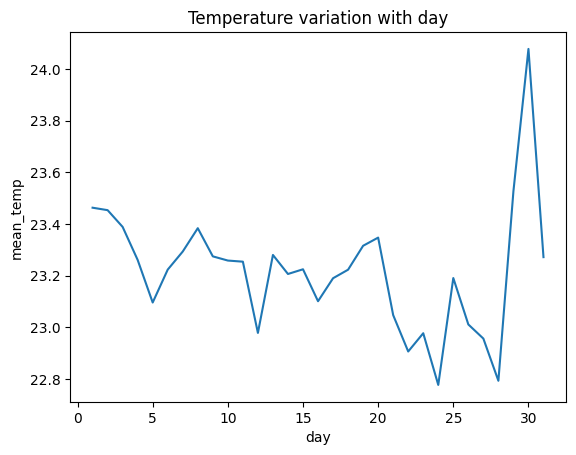

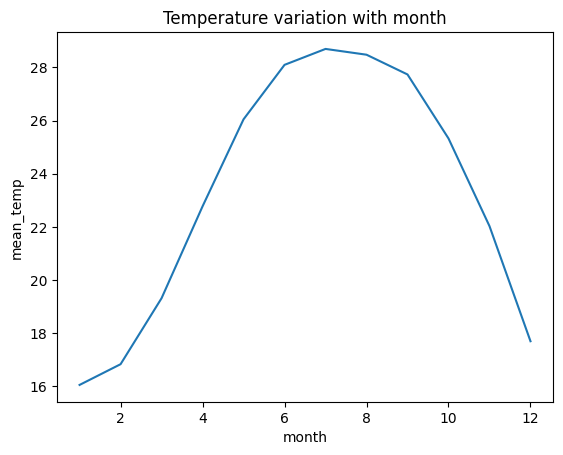

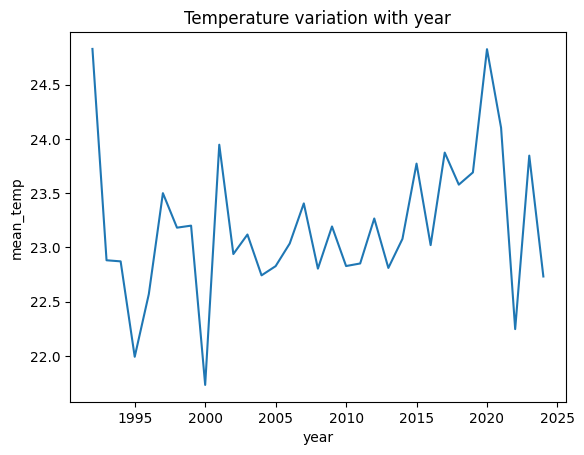

In [167]:
df_day = df
df_day = df_day.groupby(df['date'].dt.day)['mean_temp'].mean()
df_day.plot()
plt.xlabel('day')
plt.ylabel('mean_temp')
plt.title('Temperature variation with day')
plt.show()

df_month = df
df_month = df_month.groupby(df['date'].dt.month)['mean_temp'].mean()
df_month.plot()
plt.xlabel('month')
plt.ylabel('mean_temp')
plt.title('Temperature variation with month')
plt.show()


df_year = df
df_year = df_year.groupby(df['date'].dt.year)['mean_temp'].mean()
df_year.plot()
plt.xlabel('year')
plt.ylabel('mean_temp')
plt.title('Temperature variation with year')
plt.show()



We see that there small, seemingingly linear, increase in mean temperature each year. While the mean temperature behaves like a sin/cos wave in a monthly timeframe, and no pattern in a daly timeframe.
As the nature of mean_temp, max_temp and min_temp are highly similar in behaviour, we assume that min_temp and max_temp have the same patterns.
Therefore, in our first iteration of the project. We shall try to predict temperature using linear regression on a monthly timeframe, and using non-linear regression on a monthly-timeframe. (cont.)